<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 1850) (1288,)


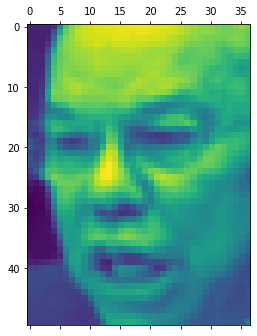

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import sklearn.neural_network as NN
from sklearn.model_selection import train_test_split


lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

print(lfw_people.target_names)
data = lfw_people.data
target = lfw_people.target
print(data.shape,target.shape)
# Ejemplo para graficar
import matplotlib.pyplot as plt
plt.matshow(lfw_people.images[500])
plt.show()

In [3]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(data)

PCA(n_components=1000, svd_solver='randomized')

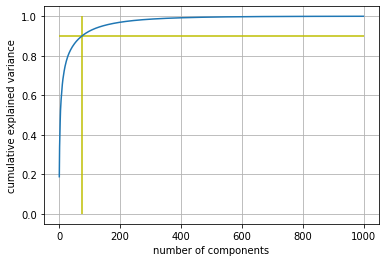

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(75,0.,1.,colors='y')
plt.hlines(0.9,0.,1000.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [6]:
pca = PCA(n_components = 150,svd_solver='randomized').fit(data)
Xfaces = data
components = pca.transform(data)
Xtrain, Xtest, ytrain, ytest = train_test_split(components,target,test_size=0.3)

C = 0.001 	Acc = 0.4186046511627907


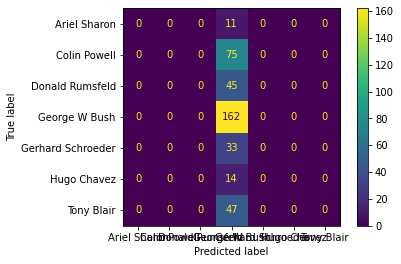

C = 0.01 	Acc = 0.4186046511627907


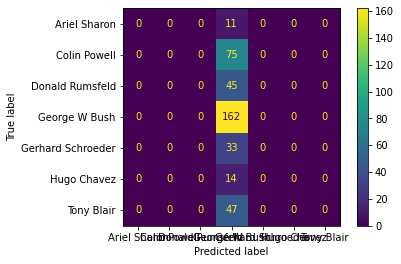

C = 1 	Acc = 0.751937984496124


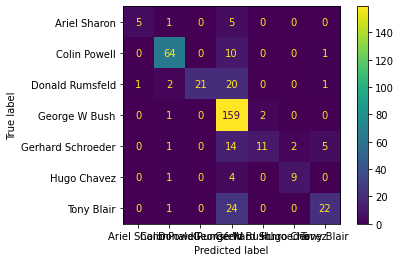

C = 5 	Acc = 0.8087855297157622


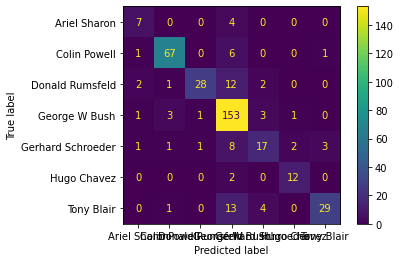

C = 10 	Acc = 0.8113695090439277


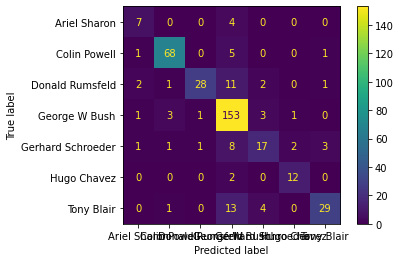

C = 100 	Acc = 0.8113695090439277


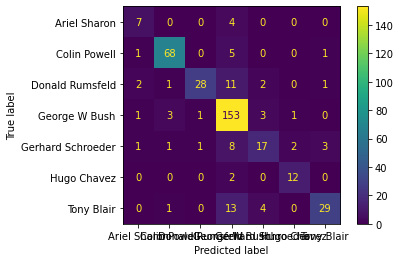

C = 1000 	Acc = 0.8113695090439277


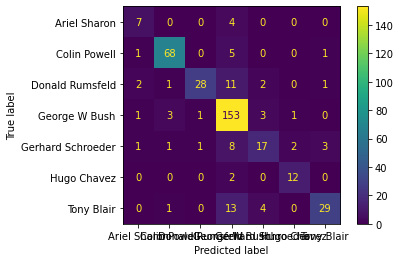

In [ ]:
C = [1e-3,1e-2, 1 , 5, 10, 100, 1000]

for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'rbf')
  model.fit(Xtrain,ytrain)

  yPred = model.predict(Xtest)
  CMAT = confusion_matrix(ytest,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
  print("C =",c,"\tAcc =",porcentajeAcierto)

  ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
  ax.plot()
  plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

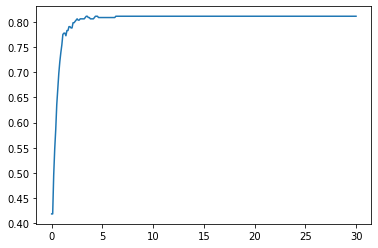

In [ ]:
C = np.linspace(5e-3,30,300)
acc_vector = []
for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'rbf')
  model.fit(Xtrain,ytrain)

  yPred = model.predict(Xtest)
  CMAT = confusion_matrix(ytest,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
  acc_vector.append(porcentajeAcierto)

plt.plot(C,acc_vector)
plt.show

C= 1e-05 	degree= 1 	Acc= 0.5400516795865633


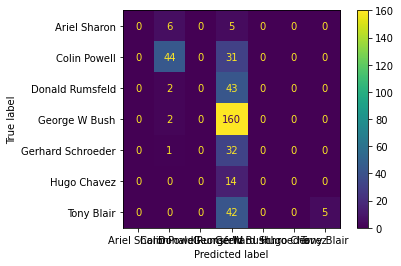

C= 1e-05 	degree= 2 	Acc= 0.6744186046511628


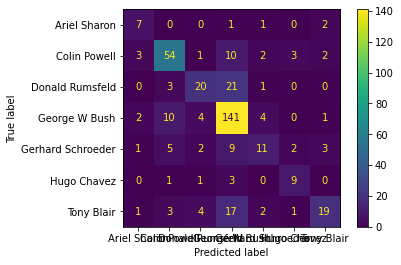

C= 1e-05 	degree= 3 	Acc= 0.6718346253229974


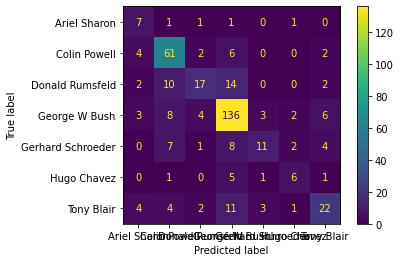

C= 0.01 	degree= 1 	Acc= 0.8268733850129198


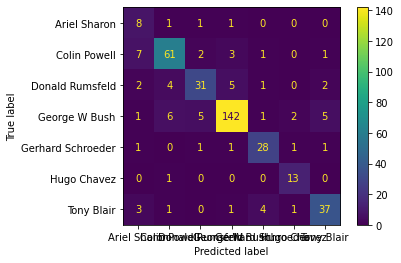

C= 0.01 	degree= 2 	Acc= 0.6744186046511628


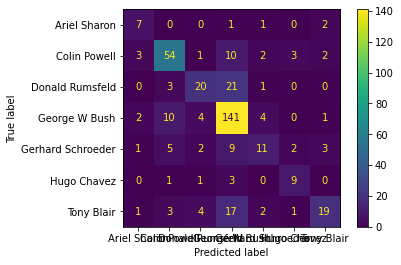

C= 0.01 	degree= 3 	Acc= 0.6718346253229974


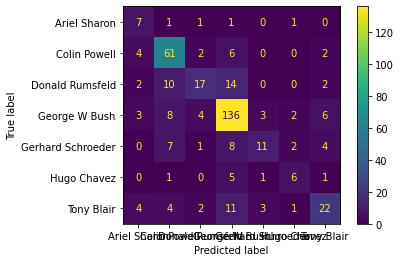

C= 1 	degree= 1 	Acc= 0.8268733850129198


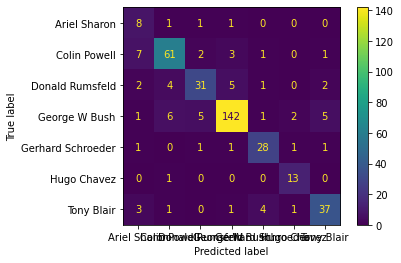

C= 1 	degree= 2 	Acc= 0.6744186046511628


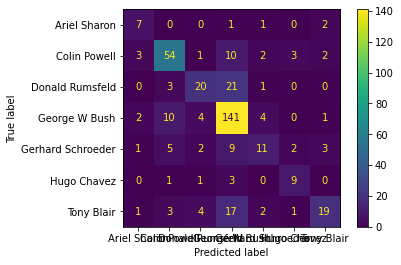

C= 1 	degree= 3 	Acc= 0.6718346253229974


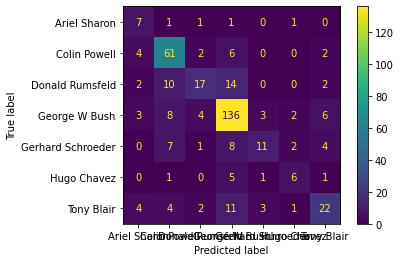

C= 10 	degree= 1 	Acc= 0.8268733850129198


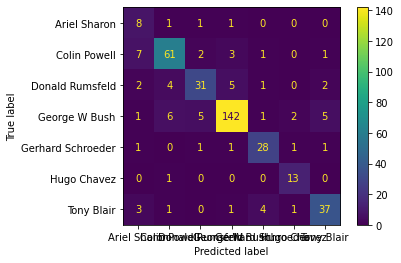

C= 10 	degree= 2 	Acc= 0.6744186046511628


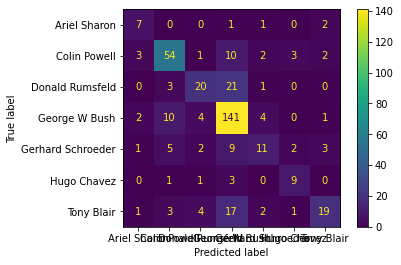

C= 10 	degree= 3 	Acc= 0.6718346253229974


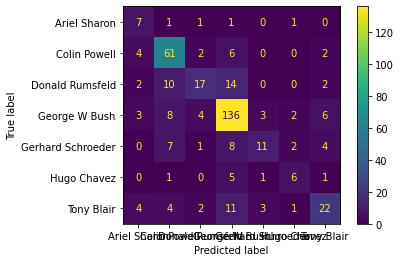

C= 100 	degree= 1 	Acc= 0.8268733850129198


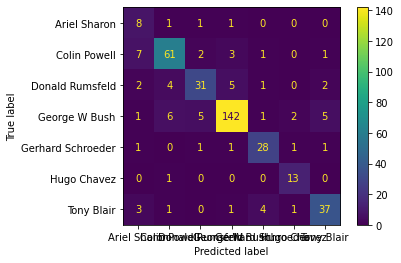

C= 100 	degree= 2 	Acc= 0.6744186046511628


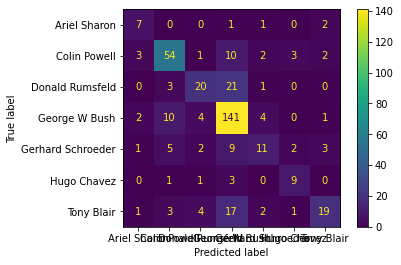

C= 100 	degree= 3 	Acc= 0.6718346253229974


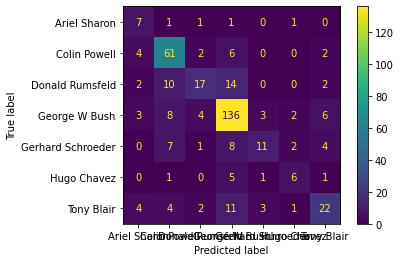

In [ ]:
C = [1e-5, 1e-2, 1, 10, 100]
degree = [1, 2, 3]

for c in C:
  # Entrenemos nuestro modelo
  for deg in degree:
    model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = deg)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("C=",c,"\tdegree=",deg,"\tAcc=",porcentajeAcierto)

    ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
    ax.plot()
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

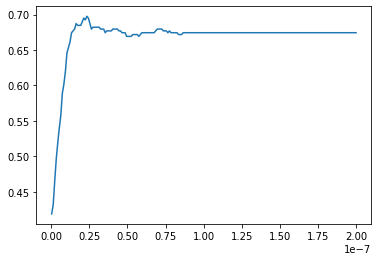

In [ ]:
C = np.linspace(3e-10,0.2e-6,200)
acc_vector = []
for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = 2)
  model.fit(Xtrain,ytrain)

  yPred = model.predict(Xtest)
  CMAT = confusion_matrix(ytest,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
  acc_vector.append(porcentajeAcierto)

plt.plot(C,acc_vector)
plt.show

0.8062015503875969


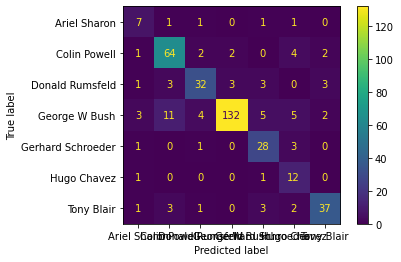

In [ ]:
# Entrenemos nuestro modelo
model = svm.LinearSVC(C = 1e-5, max_iter=3000)
model.fit(Xtrain,ytrain)

yPred = model.predict(Xtest)
CMAT = confusion_matrix(ytest,yPred)
porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
print(porcentajeAcierto)

ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
ax.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Acc: 0.3669250645994832


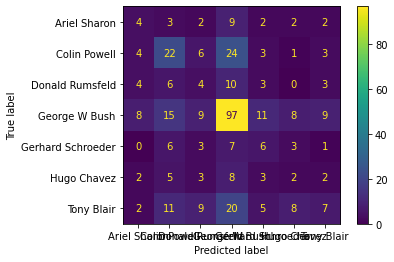

In [8]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10,10,20), alpha=1e-4, solver='adam')
model.fit(Xtrain,ytrain)

yPred = model.predict(Xtest)
CMAT = confusion_matrix(ytest,yPred)
porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
print("Acc:",porcentajeAcierto)

ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
ax.plot()
plt.show()

In [9]:
layers = [(40),(20,20),(10,10,20),(20,10,10),(10,10,10,10)]
solv = ['adam','sgd','lbfgs']
for sol in solv:
  print("With solver:",sol)
  for lay in layers:
    model = MLPClassifier(hidden_layer_sizes=lay, solver=sol, max_iter=1000, alpha=1e-4)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("Porcentaje de acierto layer",lay,":",porcentajeAcierto)



With solver: adam
Porcentaje de acierto layer 40 : 0.6020671834625323
Porcentaje de acierto layer (20, 20) : 0.4780361757105943
Porcentaje de acierto layer (10, 10, 20) : 0.4082687338501292
Porcentaje de acierto layer (20, 10, 10) : 0.4082687338501292
Porcentaje de acierto layer (10, 10, 10, 10) : 0.34108527131782945
With solver: sgd
Porcentaje de acierto layer 40 : 0.7441860465116279
Porcentaje de acierto layer (20, 20) : 0.6692506459948321
Porcentaje de acierto layer (10, 10, 20) : 0.46770025839793283
Porcentaje de acierto layer (20, 10, 10) : 0.46511627906976744
Porcentaje de acierto layer (10, 10, 10, 10) : 0.40310077519379844
With solver: lbfgs
Porcentaje de acierto layer 40 : 0.7467700258397932
Porcentaje de acierto layer (20, 20) : 0.689922480620155
Porcentaje de acierto layer (10, 10, 20) : 0.5968992248062015
Porcentaje de acierto layer (20, 10, 10) : 0.58656330749354
Porcentaje de acierto layer (10, 10, 10, 10) : 0.4573643410852713


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [10]:
layers = [(30),(10,20),(20,10),(10,10,10)]
solv = ['adam','sgd','lbfgs']
for sol in solv:
  print("With solver:",sol)
  for lay in layers:
    model = MLPClassifier(hidden_layer_sizes=lay, solver=sol, max_iter=1000, alpha=1e-4)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("Porcentaje de acierto layer",lay,":",porcentajeAcierto)

With solver: adam
Porcentaje de acierto layer 30 : 0.5607235142118863
Porcentaje de acierto layer (10, 20) : 0.48578811369509045
Porcentaje de acierto layer (20, 10) : 0.4909560723514212
Porcentaje de acierto layer (10, 10, 10) : 0.4134366925064599
With solver: sgd
Porcentaje de acierto layer 30 : 0.7545219638242894
Porcentaje de acierto layer (10, 20) : 0.5839793281653747
Porcentaje de acierto layer (20, 10) : 0.4806201550387597
Porcentaje de acierto layer (10, 10, 10) : 0.4418604651162791
With solver: lbfgs
Porcentaje de acierto layer 30 : 0.7157622739018088


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Porcentaje de acierto layer (10, 20) : 0.6072351421188631
Porcentaje de acierto layer (20, 10) : 0.6511627906976745
Porcentaje de acierto layer (10, 10, 10) : 0.5400516795865633


In [47]:
import tensorflow as tf

Xtrain, Xtest, ytrain, ytest = train_test_split(data,target,test_size=0.3)

Xtrain = Xtrain.astype('float32') / 255
Xtest = Xtest.astype('float32') / 255

In [48]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(Xtrain, Xvalid) = Xtrain[51:], Xtrain[:51] 
(ytrain, yvalid) = ytrain[51:], ytrain[:51]
print(Xtrain.shape)




(850, 1850)


In [50]:
# Reshape input data from (28, 28) to (28, 28, 1)

h = 1850
Xtrain = Xtrain.reshape(Xtrain.shape[0],h, 1)
Xvalid = Xvalid.reshape(Xvalid.shape[0],h, 1)
Xtest = Xtest.reshape(Xtest.shape[0],h, 1)

# One-hot encode the labels
ytrain = tf.keras.utils.to_categorical(ytrain, 7)
yvalid = tf.keras.utils.to_categorical(yvalid, 7)
ytest = tf.keras.utils.to_categorical(ytest, 7)

In [57]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

In [61]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(1850,1))) 
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1850, 64)          192       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 925, 64)          0         
 1D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 925, 64)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 925, 32)           4128      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 462, 32)          0         
 1D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 462, 32)          

In [62]:
model.compile(loss='categorical_crossentropy', # Para multiclase siempre se recomienda inicialmente
             optimizer='adam',
             metrics=['accuracy'])

In [70]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(Xtrain,
         ytrain,
         batch_size=128,
         epochs=10,
         validation_data=(Xvalid, yvalid),
         callbacks=[checkpointer])

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 0.6632 - accuracy: 0.7835
Epoch 1: val_loss improved from inf to 0.62819, saving model to model.weights.best.hdf5
7/7 [==============================] - 4s 515ms/step - loss: 0.6632 - accuracy: 0.7835 - val_loss: 0.6282 - val_accuracy: 0.8235
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.8106
Epoch 2: val_loss improved from 0.62819 to 0.57448, saving model to model.weights.best.hdf5
7/7 [==============================] - 4s 508ms/step - loss: 0.5858 - accuracy: 0.8106 - val_loss: 0.5745 - val_accuracy: 0.8235
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.8212
Epoch 3: val_loss improved from 0.57448 to 0.56790, saving model to model.weights.best.hdf5
7/7 [==============================] - 4s 505ms/step - loss: 0.5360 - accuracy: 0.8212 - val_loss: 0.5679 - val_accuracy: 0.8431
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss:

In [71]:
model.load_weights('model.weights.best.hdf5')

In [72]:
# Evaluate the model on test set
score = model.evaluate(Xtest, ytest, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

testEtq = model.predict(Xtest[:2,:])



 Test accuracy: 0.8527131676673889
